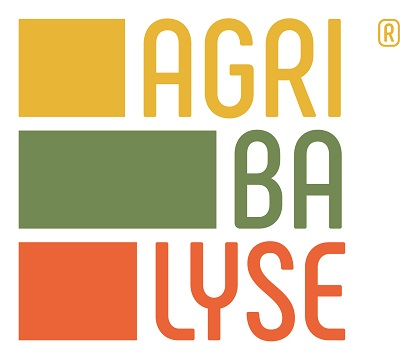

**Bonjour à tous**

**Bienvenue dans notre notebook dédié au projet "FarmPyStep" et issu de la base de donnée Agribalyse 3.0**

**Une vidéo de présentation est disponible dans le lien ci-contre : https://youtu.be/DNdv0TbxJgc**

**Notre projet est disponible dans le lien suivant : "à définir"**


# <p style="color:blue">Description du projet</p>

Le programme Agribalyse® produit des données de référence sur les impacts environnementaux 
des produits agricoles et alimentaires. Les méthodologies et les données ont été élaborées
et validées dans le cadre d’un partenariat veillant à leur qualité et leur transparence 
(ADEME, INRAE, les instituts techniques agricoles et agroalimentaires, des experts indépendants et des cabinets d’études).

Agribalyse® est la base de données publique française la plus exhaustive d’indicateurs environnementaux des produits agricoles et alimentaires fondés sur l’Analyse du Cycle de Vie. Elle fournit des indicateurs d’impacts environnementaux :
- des principales productions agricoles françaises,
- des principaux produits alimentaires consommés en France.

# <p style="color:blue">Roadmap du Notebook</p>

1. Premières explorations des données
2. Dataviz et analyses

# 1. Premières explorations des données
==================================================================

In [1]:
#Nous commençons par la phase d'importation des packages nécessaires à la découverte des données
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Description des données :**

À chaque étape de la chaîne, des bilans de matières, d’énergie et d’émissions de polluants sont réalisés et agrégés sous forme
d’un jeu d’indicateurs environnementaux :

14 indicateurs sont fournis pour chaque produit. Il s’agit des indicateurs préconisés par la Commission Européenne (projet Product Environmental Footprint).
Les 14 indicateurs ont vocation à couvrir un ensemble d’enjeux environnementaux (qualité de l’eau, de l’air, climat, sols).

À noter que l’ensemble des indicateurs est ramené à la fabrication de 1 kg de produit alimentaire.
Un score unique est également proposé : il s’agit du « single score EF » préconisé par la Commission Européenne, calculé avec
des facteurs de pondération pour chacun des indicateurs mentionnés ci-dessous.
La pondération prend à la fois en compte la robustesse relative de chacun de ces indicateurs et les enjeux environnementaux.
Ce score est un score moyen, qui comprend un arbitraire certain, et peut être adapté en fonction des enjeux du contexte
d’application.

**Les 14 indicateurs :**

- **Changement climatique (kg CO2 eq/kg de produit) :** Indicateur le plus connu, correspond à la modification du climat, affectant l’écosystème global.

- **Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit) :** La couche d’ozone est située en haute altitude dans l’atmosphère, elle protège des rayons ultraviolets solaires. Son appauvrissement augmente l’exposition de l’ensemble des êtres vivants à ces radiations négatives (cancérigènes en particulier).

- **Rayonnements ionisants (kBq U-235 eq/kg de produit) :** L’ionisation correspond aux effets de la radioactivité. Cet impact correspond aux déchets radioactifs résultants de la production de l’électricité nucléaire.

- **Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit) :** Dégradation de la qualité de l’air, principalement via la formation de brouillard de basse altitude nommé « smog ». Il a des conséquences néfastes sur la santé.

- **Particules (E-06 disease inc./kg de produit) :** Les particules fines pénètrent dans les organismes, notamment via les poumons. Elles ont un effet sur la santé humaine.

- **Acidification terrestre et eaux douces (mol H+ eq/kg de produit) :** L’acidification résulte d’émissions chimiques dans l’atmosphère qui se déposent dans les écosystèmes. Cette problématique est connue en particulier via le phénomène des pluies acides.

- **Eutrophisation terreste (mol N eq/kg de produit) :** Comme dans l’eau, l’eutrophisation terrestre correspond à un enrichissement excessif du milieu, en azote en particulier, conduisant à un déséquilibre et un appauvrissement de l’écosystème. Ceci concerne principalement les sols agricoles.

- **Eutrophisation eaux douces (E-03 kg P eq/kg de produit):** L’eutrophisation correspond à un enrichissement excessif des milieux naturels en nutriments, ce qui conduit à une prolifération d’algues et une asphyxie (zone morte). C’est ce phénomène qui est à l’origine des algues vertes. On peut le retrouver en rivière et en lac également.

- **Eutrophisation marine (E-03 kg N eq/kg de produit):** Voir ci-dessus.

- **Utilisation du sol (Pt/kg de produit):** Les terres sont une ressource finie, qui se partage entre milieux naturels, semi-naturels, productifs (agriculture) et urbains. L’usage des terres et les habitats déterminent dans une large mesure la biodiversité. Cette catégorie reflète donc l’impact d’une activité sur la dégradation des terres, en référence à « l’état naturel ».

- **Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit):** L’écotoxicité correspond à l’effet des substances chimiques (pesticides, métaux…) sur les animaux et les insectes. En ACV, elle est uniquement mesurée dans les milieux d’eau douce actuellement.

- **Épuisement des ressources eau (m3 depriv./kg de produit):** Consommation d’eau, et son épuisement dans certaines régions. Cette catégorie tient compte de la rareté (cela a plus d’impact de consommer un litre d’eau au Maroc qu’en Bretagne).

- **Épuisement des ressources énergétiques (MJ/kg de produit):** Épuisement des ressources énergétiques non renouvelables : charbon, gaz, pétrole, uranium.

- **Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit):** Épuisement des ressources minérales non renouvelables : cuivre, potasse, terres rares, sable.


**Les données complémentaires sont les suivantes** :

- Code **AGB**
- Code **CIQUAL** : table de composition nutritionnelle des aliments
- Groupe d'aliment
- Sous-groupe d'aliment
- Nom du Produit en Français
- LCI Name
- Saisonnalité
- Transport par avion (1 : par avion)
- Livraison
- Matériau d'emballage
- Préparation 
- **DQR - Note de qualité de la donnée (1 excellente ; 5 très faible) :** Une note de qualité des donnés, le DQR est associée à chaque produit agricole et alimentaire pour lequel Agribalyse® fournit des inventaires de cycle de vie et des indicateurs d’impacts.
- **Score unique EF (mPt/kg de produit):** Ce score s’exprime en Millipoints ou MPt/kg. Plus il sera élevé plus le produit aura une empreinte écologique forte.

In [2]:
#Nous chargeons le fichier "Agribalyse_Synthese.csv" dans un DataFrame appelé df
df= pd.read_csv('Agribalyse_Synthese.csv',sep=',')

#Nous affichons les 5 premières lignes du DataFrame
df.head(5)

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328


In [7]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478
Code_AGB,13712,13713,13714,13715,13000,13001,25433,11084,21508,21514,...,19580,19581,19582,19587,19589,19592,19593,19594,19598,19599
Code_CIQUAL,13712,13713,13714,13715,13000,13001,25433,11084,21508,21514,...,19580,19581,19582,19587,19589,19592,19593,19594,19598,19599
Group_aliment,"fruits, légumes, légumineuses et oléagineux","fruits, légumes, légumineuses et oléagineux","fruits, légumes, légumineuses et oléagineux","fruits, légumes, légumineuses et oléagineux","fruits, légumes, légumineuses et oléagineux","fruits, légumes, légumineuses et oléagineux","viandes, œufs, poissons",aides culinaires et ingrédients divers,"viandes, œufs, poissons","viandes, œufs, poissons",...,lait et produits laitiers,lait et produits laitiers,lait et produits laitiers,lait et produits laitiers,lait et produits laitiers,lait et produits laitiers,lait et produits laitiers,lait et produits laitiers,lait et produits laitiers,lait et produits laitiers
Sous_group_aliment,fruits,fruits,fruits,fruits,fruits,fruits,produits à base de poissons et produits de la mer,algues,viandes cuites,viandes crues,...,produits laitiers frais et assimilés,produits laitiers frais et assimilés,produits laitiers frais et assimilés,produits laitiers frais et assimilés,produits laitiers frais et assimilés,produits laitiers frais et assimilés,produits laitiers frais et assimilés,produits laitiers frais et assimilés,produits laitiers frais et assimilés,produits laitiers frais et assimilés
Nom_produit,"Abricot au sirop léger, appertisé, égoutté","Abricot au sirop léger, appertisé, non égoutté","Abricot au sirop, appertisé, égoutté","Abricot au sirop, appertisé, non égoutté","Abricot, dénoyauté, cru","Abricot, dénoyauté, sec",Accra de poisson,"Agar (algue), cru","Agneau, collier, braisé ou bouilli","Agneau, collier, cru",...,"Yaourt, lait fermenté ou spécialité laitière, ...","Yaourt, lait fermenté ou spécialité laitière, ...","Yaourt, lait fermenté ou spécialité laitière, ...","Yaourt, lait fermenté ou spécialité laitière, ...","Yaourt, lait fermenté ou spécialité laitière, ...","Yaourt, lait fermenté ou spécialité laitière, ...","Yaourt, lait fermenté ou spécialité laitière, ...","Yaourt, lait fermenté ou spécialité laitière, ...","Yaourt, lait fermenté ou spécialité laitière, ...","Yaourt, lait fermenté ou spécialité laitière, ..."
LCI,"Apricot, canned in light syrup, drained","Apricot, canned in light syrup, not drained","Apricot, in syrup, canned, drained","Apricot, in syrup, canned, not drained","Apricot, pitted, raw","Apricot, pitted, dried","Caribbean-style fish fritters, fish acras","Seaweed, agar, raw","Lamb, neck, braised or boiled","Lamb, neck, raw",...,"Yogurt, fermented milk or dairy specialty, wit...","Yogurt, fermented milk or dairy specialty, wit...","Yogurt, fermented milk or dairy specialty, wit...","Yogurt, fermented milk or dairy specialty, w f...","Yogurt, fermented milk or dairy specialty, w f...","Yogurt, fermented milk or dairy specialty, wit...","Yogurt, fermented milk or dairy specialty, plain","Yogurt, fermented milk or dairy specialty, pla...","Yogurt, fermented milk or dairy specialty, pla...","Yogurt, fermented milk or dairy specialty, pla..."
saisonnalite,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,...,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR,mix de consommation FR
usage_avion,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mode_Livraison,Ambiant (moyenne),Ambiant (moyenne),Ambiant (moyenne),Ambiant (moyenne),Ambiant (moyenne),Ambiant (moyenne),Glacé,Ambiant (long),Glacé,Glacé,...,Glacé,Glacé,Glacé,Glacé,Glacé,Glacé,Glacé,Glacé,Glacé,

In [3]:
#Nous renommons les colonnes pour gagner en lisibilité dans la construction des dataviz et la lecture des données.
NewCols={"Code AGB":"Code_AGB",
    "Code CIQUAL":"Code_CIQUAL",
    "Groupe d'aliment":"Group_aliment",
    "Sous-groupe d'aliment":"Sous_group_aliment",
    "Nom du Produit en Français":"Nom_produit",
    "LCI Name":"LCI",
    "Saisonnalité":"saisonnalite",
    "Transport par avion (1 : par avion)":"usage_avion",
    "Livraison":"Mode_Livraison",
    "Matériau d'emballage":"Type_emballage",
    "Préparation":"Mode_Preparation",
    "DQR - Note de qualité de la donnée (1 excellente ; 5 très faible)":"DQR",
    "Score unique EF (mPt/kg de produit)":"Score_EF",
    "Changement climatique (kg CO2 eq/kg de produit)":"Change_clima",
    "Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit)":"impact_ozone",
    "Rayonnements ionisants (kBq U-235 eq/kg de produit)":"rayons_ionisants",
    "Formation photochimique d'ozone (E-03 kg NMVOC eq/kg de produit)":"photochimique_ozone",
    "Particules (E-06 disease inc./kg de produit)":"particules",
    "Acidification terrestre et eaux douces (mol H+ eq/kg de produit)":"acidification",
    "Eutrophisation terreste (mol N eq/kg de produit)":"Eutrophisation_terre",
    "Eutrophisation eaux douces (E-03 kg P eq/kg de produit)":"Eutrophisation_eau_douce",
    "Eutrophisation marine (E-03 kg N eq/kg de produit)":"Eutrophisation_eau_marine",
    "Utilisation du sol (Pt/kg de produit)":"usage_sol",
    "Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit)":"ecotoxicite",
    "Épuisement des ressources eau (m3 depriv./kg de produit)":"epuisement_eau",
    "Épuisement des ressources énergétiques (MJ/kg de produit)":"epuisement_energie",
    "Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)":"epuisement_mineraux"}

df.rename(columns=NewCols, inplace=True)

In [4]:
#Nous mettons en place des fonctions permettant d'analyser la composition du dataframe

from pandas.api.types import is_numeric_dtype, is_string_dtype, is_datetime64_any_dtype
from IPython.display import display

def first_infos(df):

    n_cols = len(df.columns)
    n_rows = len(df)
    n_duplicates = df.duplicated().sum()
    n_na = df.isna().sum().sum()

    return(n_cols, n_rows, n_duplicates, n_na)
def print_infos(df, n_num, n_cat, n_text, n_date):

    cols, rows, duplicates, na = first_infos(df)

    print('Dataframe :\n\t' + str(rows) + ' Rows \n \t' +
          str(na) + ' Missing values\n\t' +
          str(duplicates) + ' Duplicates\n \t' +
          str(cols) + ' Features\n \t' +
          str(n_cat) + ' Categorical\n \t' +
          str(n_num) + ' Numerical\n \t' +
          str(n_text) + ' Text\n \t' +
          str(n_date) + ' Date')
    
def alerts(df):

    #Seuils à modifier en fonction des données
    thresh_na = 0.25
    #Pour savoir si il y a pas trop de fois la meme modalité :
    thresh_balance = 0.8 

    for col in df.columns:
        if (df[col].count()/len(df)) < thresh_na:
            print('\nThe feature ' + col + ' contains too much missing values!')
            
        # Nous prenons la première valeur du value count qui est la plus fréquente :
        if df[col].value_counts(normalize=True).values[0] > thresh_balance:
            print('\nThe feature ' + col + ' is Imbalanced. Try to fix it !')
def quality_check(df):

    # Nous initialisons les variables qui comptabiliseront le nombre de chaque type

    n_text = 0
    n_num = 0
    n_cat = 0
    n_date = 0


    data_qlt_df = pd.DataFrame(index=np.arange(0, len(df.columns)),
                               columns=('column_name', 'col_data_type', 'non_null_values', '%_non_null',
                                        'unique_values_count', 'column_type')
                               )

    for ind, col in enumerate(df.columns):
        # Nous comptons le nombre de valeurs uniques par variable
        col_unique_count = df[col].nunique()

        # Nous comptons le nombre de valeurs non nulles
        non_null = df[col].count()

        # Nous calculons le pourcentage de valeurs non nulles
        p_non_null = (df[col].count()/len(df))*100

        # Nous associons à chaque colonne un type en fonction de seuils arbitraires
        if is_datetime64_any_dtype(df[col]):
            col_type = 'Date'
            n_date += 1
        elif is_numeric_dtype(df[col]) & (col_unique_count > 50):
            col_type = 'Numerical'
            n_num += 1
        elif (is_string_dtype(df[col])) & (col_unique_count > 100):
            col_type = 'Text'
            n_text += 1
        else:
            col_type = 'Categorical'
            n_cat += 1

        data_qlt_df.loc[ind] = [col,
                                df[col].dtype,
                                non_null,
                                p_non_null,
                                col_unique_count,
                                col_type
                                ]

    # Nous utilisons la transposé de describe() pour obtenir les statistiques sur les variables numériques
    raw_num_df = df.describe().T.round(2)

    # Puis nous fusionnons le résultat avec le reste pour obtenir un Dataframe complet
    data_qlt_df = pd.merge(data_qlt_df, raw_num_df, how='left',
                           left_on='column_name', right_index=True)

    # Nous affichons les informations globales
    print_infos(df,  n_num, n_cat, n_text, n_date)

    # Nous affichons les alertes s'il y en a
    # alerts(df)

    # Nous affichons le tableau récapitulatif
    display(data_qlt_df)

In [5]:
#Nous lançons la fonction quality_check sur le Dataframe df pour obtenir un récapitulatif des données
quality_check(df)

Dataframe :
	2479 Rows 
 	0 Missing values
	0 Duplicates
 	27 Features
 	7 Categorical
 	17 Numerical
 	3 Text
 	0 Date


,column_name,col_data_type,non_null_values,%_non_null,unique_values_count,column_type,count,mean,std,min,25%,50%,75%,max
0,Code_AGB,object,2479,100,2479,Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Code_CIQUAL,int64,2479,100,2473,Numerical,2479.0,22446.08,14034.95,1000.00,12759.50,20511.00,26105.00,96778.00
2,Group_aliment,object,2479,100,11,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Sous_group_aliment,object,2479,100,58,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nom_produit,object,2479,100,2479,Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,LCI,object,2479,100,2477,Text,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,saisonnalite,object,2479,100,3,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,usage_avion,int64,2479,100,2,Categorical,2479.0,0.00,0.03,0.00,0.00,0.00,0.00,1.00
8,Mode_Livraison,object,2479,100,5,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Type_emballage,object,2479,100,19,Categorical,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Nous identifions les modalités des valeurs catégorielles du Dataframe
print(df['Group_aliment'].unique())

print(df['Sous_group_aliment'].unique())

print(df['saisonnalite'].unique())

print(df['usage_avion'].unique())

print(df['Mode_Livraison'].unique())

print(df['Type_emballage'].unique())

print(df['Mode_Preparation'].unique())

['fruits, légumes, légumineuses et oléagineux' 'viandes, œufs, poissons'
 'aides culinaires et ingrédients divers' 'boissons'
 'entrées et plats composés' 'produits céréaliers'
 'lait et produits laitiers' 'produits sucrés' 'glaces et sorbets'
 'matières grasses' 'aliments infantiles']
['fruits' 'produits à base de poissons et produits de la mer' 'algues'
 'viandes cuites' 'viandes crues' 'herbes' 'boisson alcoolisées'
 'plats composés' 'fruits à coque et graines oléagineuses'
 'pâtes, riz et céréales' 'farines et pâtes à tarte' 'poissons crus'
 'charcuteries' 'légumes' 'fromages' 'gâteaux et pâtisseries'
 'pains et viennoiseries' 'pommes de terre et autres tubercules'
 'poissons cuits' 'chocolats et produits à base de chocolat'
 'céréales de petit-déjeuner et biscuits' 'glaces' 'ingrédients divers'
 'feuilletées et autres entrées' 'beurres' 'huiles et graisses végétales'
 'céréales et biscuits infantiles' 'autres produits à base de viande'
 'boissons sans alcool' 'laits et boissons in

**<p style="color:blue">Commentaires des 2 codes précédents :</p>**

- Le jeu de données ne contient pas de valeurs manquantes et ne contient pas de doublon,
- Nous disposons de 7 variables qualitative :
    - Group_aliment,
    - Sous_group_aliment,
    - saisonnalite,
    - usage_avion,
    - Mode_Livraison,
    - Type_emballage,
    - Mode_Preparation,
    
Il est important de répérer les modalités des variables qualitatives pour la suite, ne serait-ce, que pour interpréter les différents graphiques que nous utiliserons pour l'analyse.

Le format des variables catégorielles semble convenir : il y a peu de modalités. **6 des variables ont des modalités < à 20**, ce qui évitera de surcharger visuellement l'analyse.

Il faudra éventuellement procéder à un regroupement des modalités pour la variable **'Sous_group_aliment'** qui a **58** modalités.

# 2. Dataviz et analyses
=====================================

Nous allons afficher en utilisant des graphiques type camembert la répartition des modalités en pourcentage des variables qualitatives suivantes :
- Group_aliment,
- Sous_group_aliment,
- Mode_Livraison,
- Type_emballage,
- Mode_Preparation.

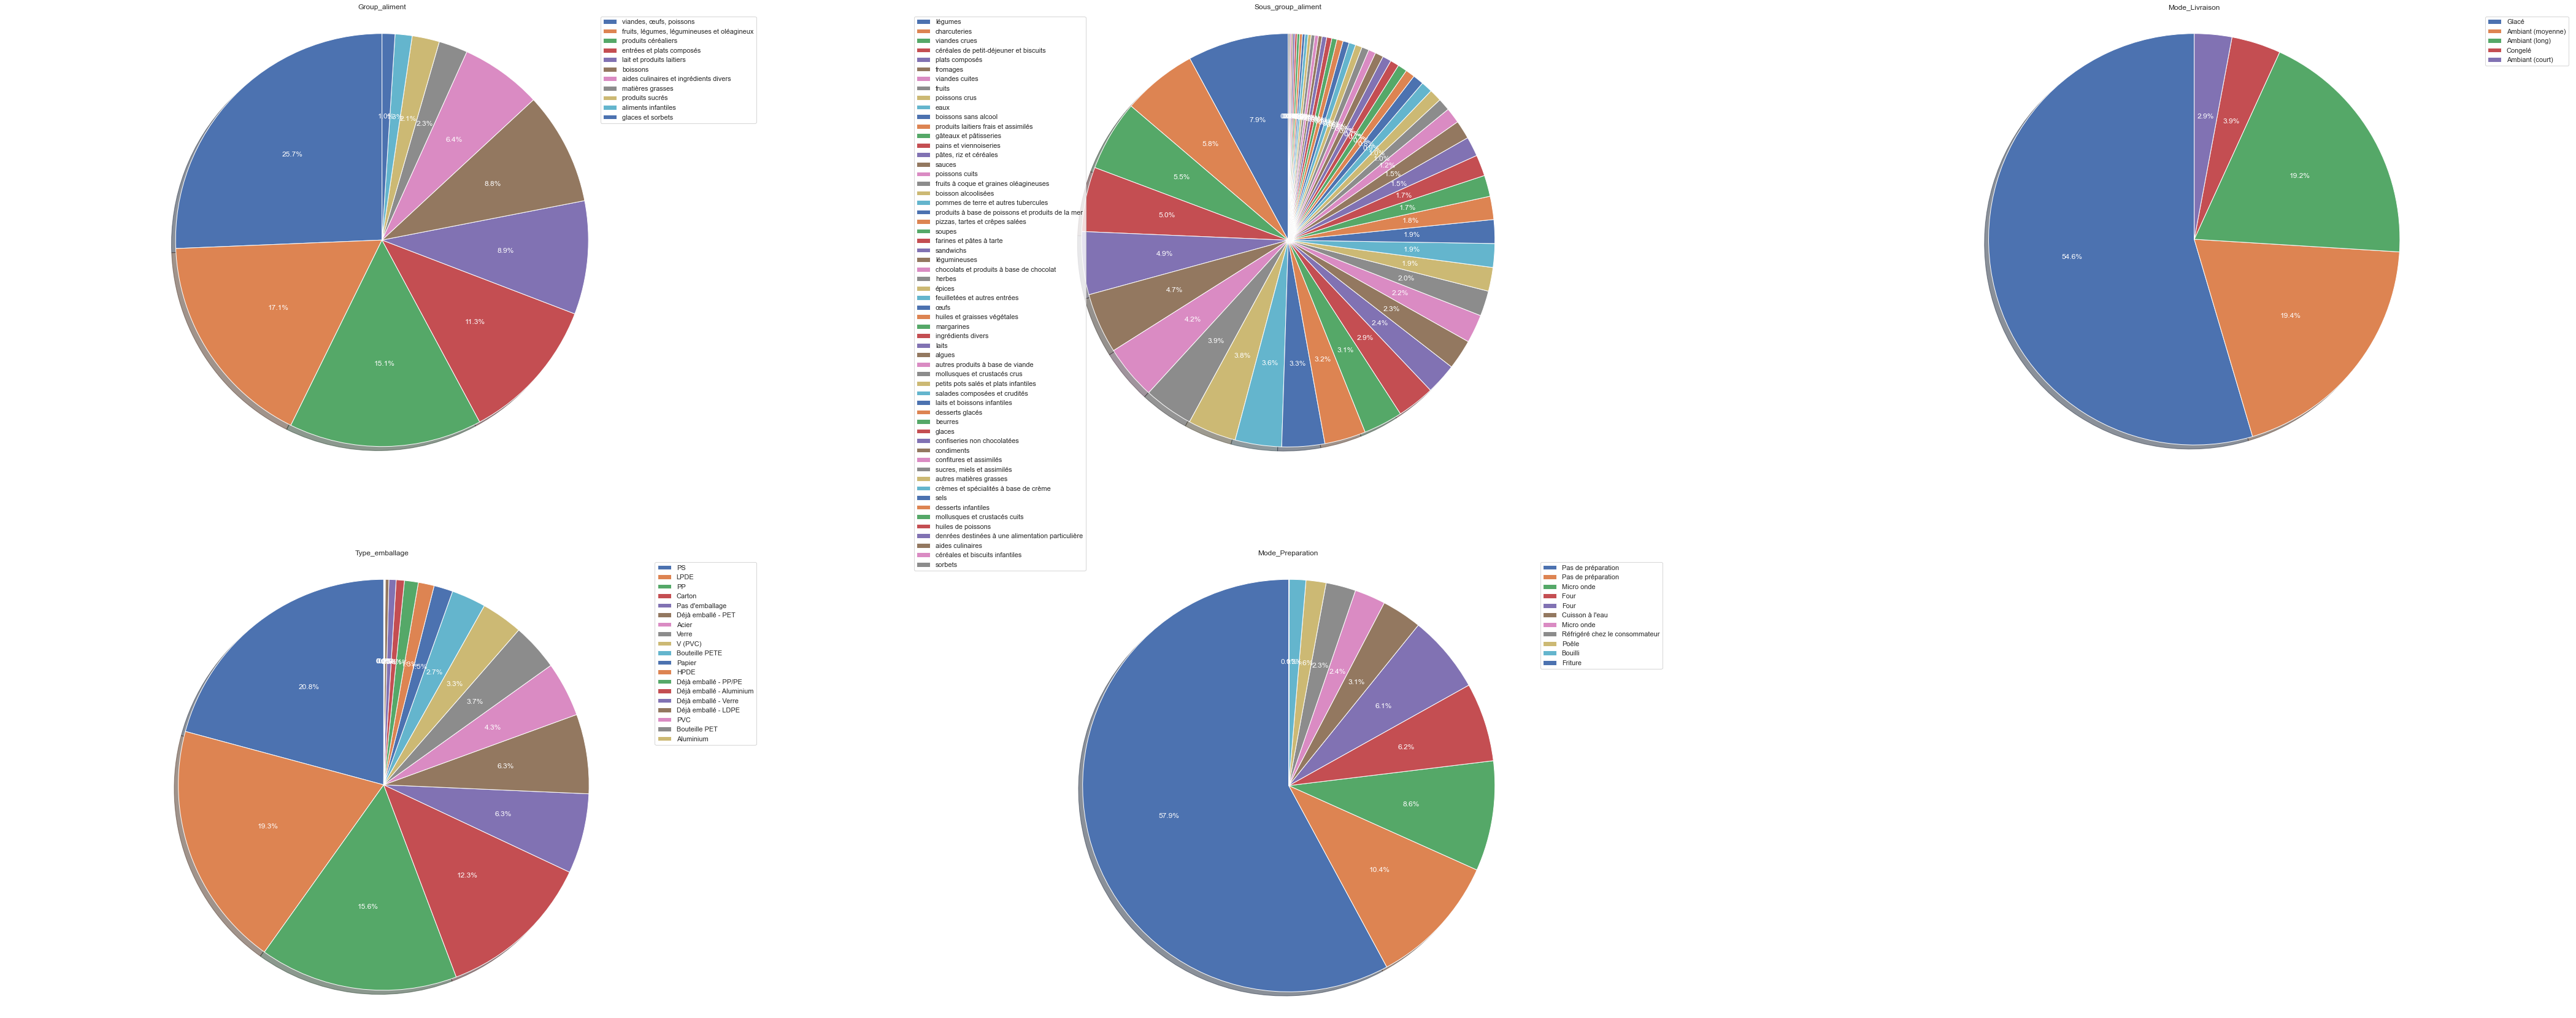

In [7]:
sns.set(style="whitegrid")
liste_variable_quali = ['Group_aliment','Sous_group_aliment','Mode_Livraison','Type_emballage','Mode_Preparation']
fig1, ax1 = plt.subplots(2,3,figsize=(75,30))
coordonees = [(0,0),(0,1),(0,2),(1,0),(1,1)]
explode =  [[0,0.1,0,0],[0.1,0],[0.1,0],[0,0,0,0],[0,0.1]]

for i,j,k in zip(liste_variable_quali,coordonees,explode): 
    
    ax1[j[0],j[1]].pie(df[i].value_counts(),
                       labels=df[i].value_counts().index.values, 
                       autopct='%1.1f%%',
                       shadow=True, 
                       startangle=90,textprops=dict(color="w"))
    
    ax1[j[0],j[1]].axis('equal')
    ax1[j[0],j[1]].set_title(i)
    ax1[j[0],j[1]].legend(loc="best")
    
fig1.delaxes(ax1[1, 2])
plt.show()

**<p style="color:blue">Commentaires :**</p>

Pour la variable **Group_aliment**, notons que la modalité **viandes, oeufs, poissons** représente un quart de la répartition.
Les modalités **fruits, légumes, légumineuses et oléagineux et produits céréaliers** suivent dans un intervalle de **15 à 17%.**
Ces **3 modalités** représentent à elles seules près de **58%** de la variable Group_aliment.

La variable **Sous_group_aliment** contient un nombre de modalités très important qui surcharge la visualisation.
Cependant, nous pouvons noter que les modalités **légumes, charcuteries, viandes crue, céréales de petit-déjeuner et biscuits** ont un pourcentage **> ou = à 5%.**

Concernant la variable **Mode_Livraison**, nous constatons que la modalité **glacé** est majoritaire avec un taux de **54,6%**; suivi des 2 modalités **ambiant(long)** et **ambiant(moyenne)** avec des taux autour des **19%**.

Concernant la variable **Mode_Preparation**, nous constatons que la modalité **Pas de preparation** qui apparait 2 fois est également majoritaire avec un taux de **57,9% + 10,4%**; suivi des autres modalités avec des taux **< à 10%**.

La variable **Type_emballage** contient un nombre de modalités important, néanmoins 4 modalités se détachent du lot :
- **PS** (Polystyrène / Barquettes (beurre, margarine), pots de yaourt, biberon) : **20,8%**
- **LPDE** (Polyéthylène basse densité / Types Barquettes, films alimentaires, flacons, jouets, sacs congélation, sacs poubelles, sachets, récipients souples) : **19,3%**
- **PP** (Polypropylène / Barquettes (beurre, margarine), pots de yaourt, biberons) : **15,6%**
- **Carton** : **12,3%**

Nous vous proposons à présent de réaliser une première observation des indicateurs portant sur les impacts environnementaux.
Nous observerons les variables suivantes :
    
- Change_clima
- impact_ozone
- rayons_ionisants
- photochimique_ozone
- particules
- acidification
- usage_sol
- ecotoxicite

**<p style="color:blue">Nous optons pour une visualisation des données à l'aide de la librairie interactive BOKEH**</p>

In [8]:
#Importation des packages
from bokeh.plotting import figure, show,output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LabelSet
from bokeh.models.widgets import Panel, Tabs

**<p style="color:red">Lancez l'exécution du code ci-dessous pour afficher l'onglet de visualisation**</p>

In [9]:
#Création de l'onglet de la variable Change_clima
p1 = figure(title="Distribution de la variable Change_clima",  x_range= [0,65], y_range = [0,1860])
p1.xaxis.axis_label="Score"
p1.yaxis.axis_label="Fréquence"
hist, bins_edges = np.histogram( a=df["Change_clima"],bins=10)
source = ColumnDataSource({'hist' : hist,'x' : bins_edges[:-1]})
p1.vbar(top = 'hist',x = 'x', width = bins_edges[1]-bins_edges[0], source = source, color='green')
hover=HoverTool(tooltips=[("Score","@x"),("Fréquence","@hist")])
p1.add_tools(hover)

#Création de l'onglet de la variable impact_ozone
p2 = figure(title="Distribution de la variable impact_ozone", x_range= [0,10], y_range = [0,1175])
p2.xaxis.axis_label="Score"
p2.yaxis.axis_label="Fréquence"
hist, bins_edges = np.histogram( a=df["impact_ozone"],bins=1000)
source = ColumnDataSource({'hist' : hist,'x' : bins_edges[:-1]})
p2.vbar(top = 'hist',x = 'x', width = bins_edges[1]-bins_edges[0], source = source, color='blue')
hover=HoverTool(tooltips=[("Score","@x"),("Fréquence","@hist")])
p2.add_tools(hover)

#Création de l'onglet de la variable rayons_ionisants
p3 = figure(title="Distribution de la variable rayons_ionisants", x_range= [0,35], y_range = [0,800])
p3.xaxis.axis_label="Score"
p3.yaxis.axis_label="Fréquence"
hist, bins_edges = np.histogram( a=df["rayons_ionisants"],bins=100)
source = ColumnDataSource({'hist' : hist,'x' : bins_edges[:-1]})
p3.vbar(top = 'hist',x = 'x', width = bins_edges[1]-bins_edges[0], source = source, color='red')
hover=HoverTool(tooltips=[("Score","@x"),("Fréquence","@hist")])
p3.add_tools(hover)

#Création de l'onglet de la variable photochimique_ozone
p4 = figure(title="Distribution de la variable photochimique_ozone", x_range= [0,330], y_range = [0,1000])
p4.xaxis.axis_label="Score"
p4.yaxis.axis_label="Fréquence"
hist, bins_edges = np.histogram( a=df["photochimique_ozone"],bins=60)
source = ColumnDataSource({'hist' : hist,'x' : bins_edges[:-1]})
p4.vbar(top = 'hist',x = 'x', width = bins_edges[1]-bins_edges[0], source = source, color='purple')
hover=HoverTool(tooltips=[("Score","@x"),("Fréquence","@hist")])
p4.add_tools(hover)

#Création de l'onglet de la variable particules
p5 = figure(title="Distribution de la variable particules", x_range= [0,7], y_range = [0,95])
p5.xaxis.axis_label="Score"
p5.yaxis.axis_label="Fréquence"
hist, bins_edges = np.histogram( a=df["particules"],bins=1000)
source = ColumnDataSource({'hist' : hist,'x' : bins_edges[:-1]})
p5.vbar(top = 'hist',x = 'x', width = bins_edges[1]-bins_edges[0], source = source, color='orange')
hover=HoverTool(tooltips=[("Score","@x"),("Fréquence","@hist")])
p5.add_tools(hover)

#Création de l'onglet de la variable acidification
p6 = figure(title="Distribution de la variable acidification", x_range= [0,1], y_range = [0,140])
p6.xaxis.axis_label="Score"
p6.yaxis.axis_label="Fréquence"
hist, bins_edges = np.histogram( a=df["acidification"],bins=1000)
source = ColumnDataSource({'hist' : hist,'x' : bins_edges[:-1]})
p6.vbar(top = 'hist',x = 'x', width = bins_edges[1]-bins_edges[0], source = source, color='pink')
hover=HoverTool(tooltips=[("Score","@x"),("Fréquence","@hist")])
p6.add_tools(hover)

#Création de l'onglet de la variable usage_sol
p7 = figure(title="Distribution de la variable usage_sol", x_range= [0,5600], y_range = [0,1200])
p7.xaxis.axis_label="Score"
p7.yaxis.axis_label="Fréquence"
hist, bins_edges = np.histogram( a=df["usage_sol"],bins=50)
source = ColumnDataSource({'hist' : hist,'x' : bins_edges[:-1]})
p7.vbar(top = 'hist',x = 'x', width = bins_edges[1]-bins_edges[0], source = source, color='brown')
hover=HoverTool(tooltips=[("Score","@x"),("Fréquence","@hist")])
p7.add_tools(hover)

#Création de l'onglet de la variable ecotoxicite
p8 = figure(title="Distribution de la variable ecotoxicite", x_range= [0,3000], y_range = [0,1100])
p8.xaxis.axis_label="Score"
p8.yaxis.axis_label="Fréquence"
hist, bins_edges = np.histogram( a=df["ecotoxicite"],bins=50)
source = ColumnDataSource({'hist' : hist,'x' : bins_edges[:-1]})
p8.vbar(top = 'hist',x = 'x', width = bins_edges[1]-bins_edges[0], source = source, color='green')
hover=HoverTool(tooltips=[("Score","@x"),("Fréquence","@hist")])
p8.add_tools(hover)

#Création de l'affichage des graphiques
tab1 = Panel(child=p1, title="Change_clima")
tab2 = Panel(child=p2, title="impact_ozone")
tab3 = Panel(child=p3, title="rayons_ionisants")
tab4 = Panel(child=p4, title="photochimique_ozone")
tab5 = Panel(child=p5, title="particules")
tab6 = Panel(child=p6, title="acidification")
tab7 = Panel(child=p7, title="usage_sol")
tab8 = Panel(child=p8, title="ecotoxicite")

tabs = Tabs(tabs=[tab1, tab2, tab3, tab4, tab5, tab6, tab7, tab8])

show(tabs)

**<p style="color:blue">Commentaires :**</p>

Première constatation, les rapports d'échelle sont importants et certaines données ont des écarts significatifs.
Une normalisation ultérieure des données sera nécessaire.

Ainsi, certaines variables semblent à priori contenir des valeurs abberantes.
A titre d'exemple, la variable **impact_ozone** a une moyenne de **0.57**, or nous avons une valeur qui monte à **243.45**.

A contrario, nous avons également des valeurs **min négatives** pour les variables **usage_sol** (-125.34) et **epuisement_eau** (-15.07).

Il est important de rappeler que la Commission Européenne recommande de la prudence dans l’utilisation des données avec des DQR supérieurs à 3. 

Dans la base de données, **67 % des données ont un DQR jugé bon ou très bon (1 à 3).**

Nous vous proposons à présent d'observer les impacts environnementaux en fonction des modalités de la variable **Group_aliment** et en fonction des variables suivantes :

- Change_clima,
- epuisement_energie,
- Eutrophisation_eau_marine,
- acidification,
- usage_sol.

Nous allons nous servir de **nuages de points** afin de faire cet état des lieux.

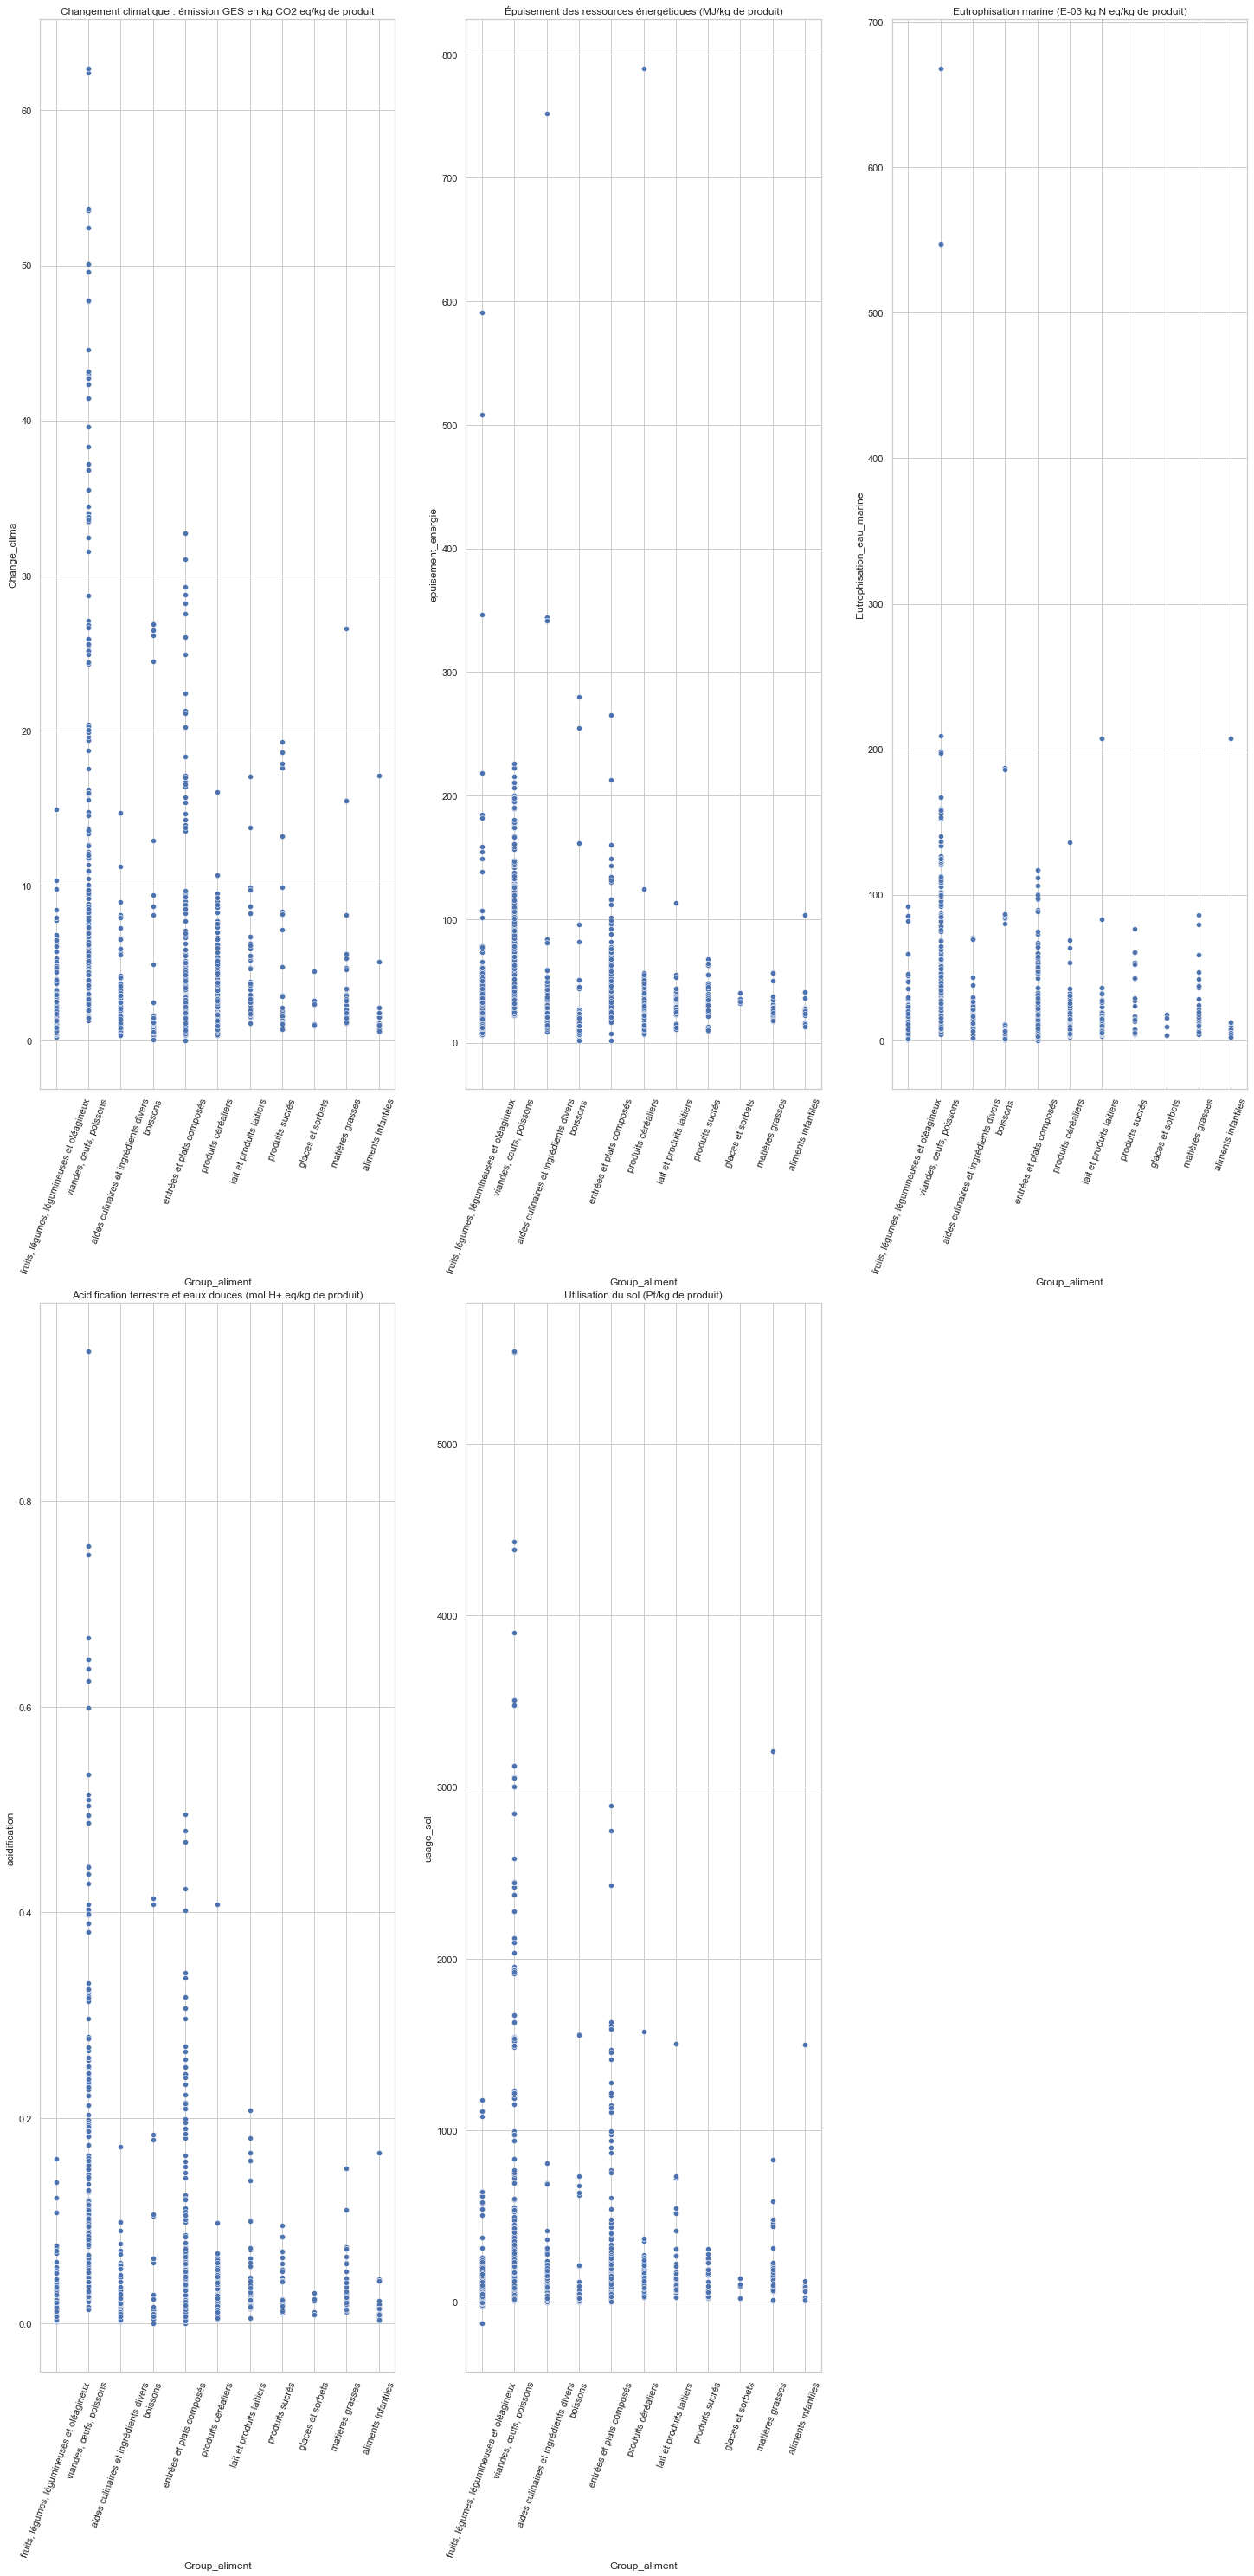

In [10]:
plt.figure(figsize=(25, 50))

plt.subplot(231)
plt.title(label='Changement climatique : émission GES en kg CO2 eq/kg de produit')
sns.scatterplot(x = 'Group_aliment', y = 'Change_clima', data = df);
plt.xticks(rotation=70)

plt.subplot(232)
plt.title(label='''Épuisement des ressources énergétiques (MJ/kg de produit)''')
sns.scatterplot(x = 'Group_aliment', y = 'epuisement_energie', data = df);
plt.xticks(rotation=70);

plt.subplot(233)
plt.title(label='''Eutrophisation marine (E-03 kg N eq/kg de produit)''')
sns.scatterplot(x = 'Group_aliment', y = 'Eutrophisation_eau_marine', data = df);
plt.xticks(rotation=70);

plt.subplot(234)
plt.title(label='''Acidification terrestre et eaux douces (mol H+ eq/kg de produit)''')
sns.scatterplot(x = 'Group_aliment', y = 'acidification', data = df);
plt.xticks(rotation=70);

plt.subplot(235)
plt.title(label='''Utilisation du sol (Pt/kg de produit)''')
sns.scatterplot(x = 'Group_aliment', y = 'usage_sol', data = df);
plt.xticks(rotation=70);

**<p style="color:blue">Commentaires :**</p>

On note des ordres de grandeur différents selon les catégories d'aliments.
Le groupe **viandes, oeufs, poissons** arrivent généralement en tête pour la majorité des impacts suivi par la cultures des **produits céréaliers** et enfin les **fruits,légumes légumineuses et oléagineux**.

Cette hiérarchie entre groupes d'aliments est moins prononcée pour certains impacts, notamment **l’eutrophisation**, mais elle est très visible pour **l’acidification** et **l’occupation des terres**. Cela suggère que les impacts sont liés entre eux et peuvent avoir des sources communes.

Les impacts **acidification** et **occupation des terres** des **productions végétales** (fruits, légumes...) sont aussi relativement faibles par rapport à ceux des **produits animaux** (viandes, oeufs, poissons).

A titre indicatif, les **sources d’impacts prépondérantes** pour les **productions végétales** sont les suivantes :
- les émissions au champ, 
- la production des engrais 
- et la mécanisation.

Les impacts environnementaux des **produits issus de l'élevage** s'expliquent essentiellement par une chaîne de production plus longue : les impacts générés par la production de l’alimentation nécessaire à l’animal pendant toute sa vie lui sont attribués.

Il faut noter également que les données mise à disposition par AGRIBALYSE ne prennent pas en compte l’impact des **produits phytosanitaires**.
Certaines cultures n'apparaissent pas : par exemple, la culture de la **vigne**.

Pour appuyez le point soulevé précedemment du **lien de certains impacts entre eux**, nous terminons avec une matrice des corrélations.

In [11]:
#Création d'un Dataframe df2 avec toutes les variables portant sur les indicateurs environnementaux.

df2=df[['Change_clima',
       'impact_ozone', 'rayons_ionisants', 'photochimique_ozone', 'particules',
       'acidification', 'Eutrophisation_terre', 'Eutrophisation_eau_douce',
       'Eutrophisation_eau_marine', 'usage_sol', 'ecotoxicite',
       'epuisement_eau', 'epuisement_energie', 'epuisement_mineraux']]

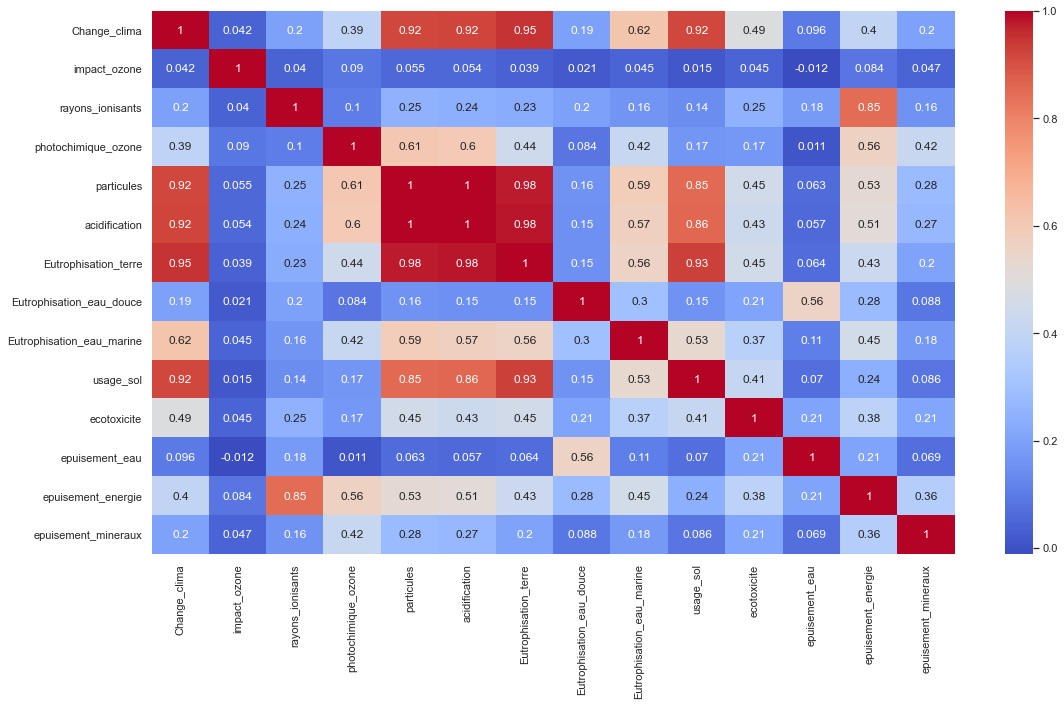

In [12]:
#Création de la matrice des corrélations
corr = df2.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr, annot=True, cmap = 'coolwarm')
plt.show()

**<p style="color:blue">Commentaires :**</p>

Nous observons que les variables **particules** et **acidification** ont une corrélation très élevée avec **Eutrophisation_terre** (>0.95).

Cette même variable **Eutrophisation_terre** est également très corrélée avec les variables **change_clima** et **usage_sol**

Sans surprise, les impacts environnementaux sont multiples et sont liés entre eux. 

Ce résultat confirme l'impact de la production à partir des sols agricoles qui engendre un appauvrissement de l’écosystème.

Pour terminer, analysons les variables **Score_EF** et **DQR**.

Nous proposons un nuage de points de la variable Score_EF en fonction de la variabe DQR et de la variable du groupe d'aliments.

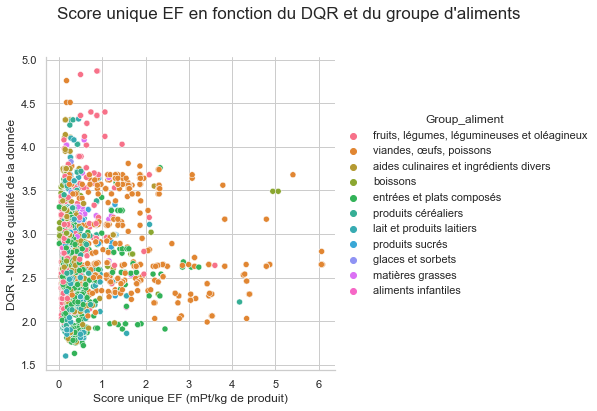

In [13]:
sns.relplot(x="Score_EF",y="DQR",data=df, hue='Group_aliment')
plt.suptitle("Score unique EF en fonction du DQR et du groupe d'aliments", size=17, y=1.1)
plt.xlabel("Score unique EF (mPt/kg de produit)")
plt.ylabel("DQR - Note de qualité de la donnée")

plt.show()

**<p style="color:blue">Commentaires :**</p>

Première observation pour tous les groupes d’aliments, c’est l’agriculture qui semble influencer significativement le score unique et qui différencie l’empreinte écologique des différents groupes d’aliments.

En effet, l’étape de transformation serait la deuxième étape de production avec le plus d’influence mais les valeurs sont assez hétérogènes, entre 0 et 1. Cela dépend du type de produits auxquels nous nous confrontons : certains groupes d’aliments sont plus transformés que d’autres comme les aides culinaires et ingrédients divers ou les produits sucrés.

La catégorie **viande, oeuf, poisson** arrive en tête avec les plus forts scores uniques EF (>6).

En effet, il faut rappeler que la production de viande est en général très gourmande en eau. L’élevage émet également des quantités importantes de nitrates, phosphates et autres substances.

**<p style="color:blue">Conclusion :**</p>

Il est important de rappeler que la méthode Agribalyse et les ACV, reste controversée pour l’appréciation des impacts environnementaux.
Les méthodes de calcul et les paramétrages Agribalyse ne sont pas encore mûrs et ne permettent pas de faire de l’éco-conception ou d’améliorer les pratiques « au champ », à l’échelle des changements de systèmes de production. 
Or c’est précisément sur la production agricole que repose l’immense majorité des leviers d’amélioration du score environnemental des produits prêts à consommer.

A noter que la start-up qui a développé l’application **Yuka**, a lancé récemment un **nouvel onglet dédié à l’«éco-score»**, avec une **notation de A à E sur 30 000 produits** pour « permettre aux consommateurs qui le souhaitent de s’orienter vers une alimentation plus durable ». 

Ce système a été développé avec une dizaine d’autres acteurs. Ils ne sont pas les seuls à se lancer sur ce créneau prometteur, et chacun tente sa méthode.
Lien du lancement de l'éco-score sur Yuka : https://yuka.io/eco-score/